In [1]:
import sys
import os
import pandas
from ipynb.fs.full.clean_gadget import clean_gadget
from ipynb.fs.full.vectorize_gadget import GadgetVectorizer
from ipynb.fs.full.blstm import BLSTM

In [2]:
"""
Parses gadget file to find individual gadgets
Yields each gadget as list of strings, where each element is code line
Has to ignore first line of each gadget, which starts as integer+space
At the end of each code gadget is binary value
    This indicates whether or not there is vulnerability in that gadget
"""
def parse_file(filename):
    with open(filename, "r", encoding="utf8") as file:
        gadget = []
        gadget_val = 0
        for line in file:
            stripped = line.strip()
            if not stripped:
                continue
            if "-" * 33 in line and gadget: 
                yield clean_gadget(gadget), gadget_val
                gadget = []
            elif stripped.split()[0].isdigit():
                if gadget:
                    # Code line could start with number (somehow)
                    if stripped.isdigit():
                        gadget_val = int(stripped)
                    else:
                        gadget.append(stripped)
            else:
                gadget.append(stripped)

In [3]:

##Uses gadget file parser to get gadgets and vulnerability indicators
##Assuming all gadgets can fit in memory, build list of gadget dictionaries
    ##Dictionary contains gadgets and vulnerability indicator
    ##Add each gadget to GadgetVectorizer
##Train GadgetVectorizer model, prepare for vectorization
##Loop again through list of gadgets
    ##Vectorize each gadget and put vector into new list
##Convert list of dictionaries to dataframe when all gadgets are processed

def get_vectors_df(filename, vector_length=100):
    gadgets = []
    count = 0
    vectorizer = GadgetVectorizer(vector_length)
    for gadget, val in parse_file(filename):
        count += 1
        print("Collecting gadgets...", count, end="\r")
        vectorizer.add_gadget(gadget)
        row = {"gadget" : gadget, "val" : val}
        gadgets.append(row)
    print('Found {} forward slices and {} backward slices'
          .format(vectorizer.forward_slices, vectorizer.backward_slices))
    print()
    print("Training model...", end="\r")
    vectorizer.train_model()
    print()
    vectors = []
    count = 0
    for gadget in gadgets:
        count += 1
        print("Processing gadgets...", count, end="\r")
        vector = vectorizer.vectorize(gadget["gadget"])
        row = {"vector" : vector, "val" : gadget["val"]}
        vectors.append(row)
    print()
    df = pandas.DataFrame(vectors)
    return df

In [4]:
###Gets filename, either loads vector DataFrame if exists or creates it if not
###Instantiate neural network, pass data to it, train, test, print accuracy

def main():
    filename = input('Enter data file path :  ')
    #filename = r"C:\Users\61450\Downloads\vd\cwe399_cgd.txt"
    parse_file(filename)
    base = os.path.splitext(os.path.basename(filename))[0]
    vector_filename = base + "_gadget_vectors.pkl"
    print('Vector FileName : '+vector_filename)
    vector_length = 50
    if os.path.exists(vector_filename):
        df = pandas.read_pickle(vector_filename)
    else:
        df = get_vectors_df(filename, vector_length)
        df.to_pickle(vector_filename)
    blstm = BLSTM(df)
    print('\nTraining Model')
    blstm.train()
    blstm.test()

def predict(self, data, batch_size=64):
        vectors = np.stack(data.iloc[:, 1].values)
        X = vectors
        predictions = (self.model.predict(X, batch_size=batch_size)).round()
        print(predictions)

Enter data file path :  C:\Users\61450\Downloads\vd\cwe399_cgd.txt
Vector FileName : cwe399_cgd_gadget_vectors.pkl
Found 13697 forward slices and 8188 backward slices6 991611975 13279 18224 20549 21506

Training model...
Processing gadgets... 21885590 13790 15872


data:         val                                             vector
0        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1        0  [[0.03603706508874893, -0.03402332589030266, -...
2        0  [[0.03603706508874893, -0.03402332589030266, -...
3        0  [[0.03476965054869652, -0.03629425913095474, -...
4        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
7        0  [[0.2065793126821518, -0.15920016169548035, -0...
8        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9        0  [[0.37225231528282166, -0.3926237225532532, -0...
10       0  [[0.26478472352027893, -0.4495027


Training Model
Epoch 1/4
183/183 [==============================] - 49s 267ms/step - loss: 0.6343 - accuracy: 0.6417
Epoch 2/4
183/183 [==============================] - 48s 260ms/step - loss: 0.6029 - accuracy: 0.6736
Epoch 3/4
183/183 [==============================] - 48s 263ms/step - loss: 0.5886 - accuracy: 0.6837
Epoch 4/4
183/183 [==============================] - 48s 264ms/step - loss: 0.5808 - accuracy: 0.6884


Testing Model *****
46/46 [==============================] - 4s 91ms/step - loss: 0.5758 - accuracy: 0.6843

Accuracy is... 0.6842827796936035
Confusion Matrix : 
[1189] [652]
[268] [805]


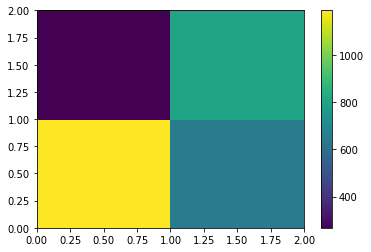


False positive rate is : 0.4474948524365134

False negative rate is : 0.18393960192175704

True positive rate is  : 0.8160603980782429

Precision is:  0.645844649646931

F1 score is :  0.7210430563978169


In [5]:
if __name__ == "__main__":
    main()

Enter data file path :  C:\Users\61450\Downloads\vd\cwe119_cgd.txt
Vector FileName : cwe119_cgd_gadget_vectors.pkl
Found 23730 forward slices and 16023 backward slices6 10901 11845 13620 15856 18314 19544 23043 26792 2909430291 31541 3624438696

Training model...
Processing gadgets... 39753 15760 25028 32904 37587


data:         val                                             vector
0        0  [[0.0736742690205574, 0.0596187561750412, 0.03...
1        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        0  [[0.2030126303434372, -0.03177650272846222, 0....
4        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6        0  [[0.07548564672470093, -0.0138714499771595, 0....
7        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
8        0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9        0  [[0.07548564672470093, -0.0138714499771595,

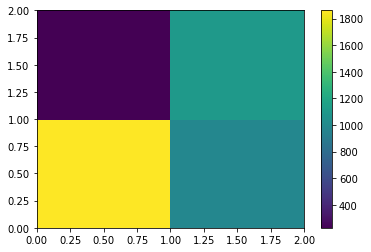


False positive rate is : 0.4707854406130268

False negative rate is : 0.1082375478927203

True positive rate is  : 0.8917624521072797

Precision is:  0.654481546572935

F1 score is :  0.754915872694101


In [6]:
if __name__ == "__main__":
    main()

In [64]:
import pandas as pd

FPR_blstm1=0.47078
FNR_blstm1=0.108237
precision_blstm1=0.65448154
f1_score_blstm1= 0.7549158

FPR_lstm1=0.5795019
FNR_lstm1=0.0378
precision_lstm1=0.624106
f1_score_lstm1 = 0.757113

class_level_scores_cwe119 = {
    "BLSTM_Model": [FPR_blstm1, FNR_blstm1, precision_blstm1, f1_score_blstm1],
    "LSTM_Model": [FPR_lstm1, FNR_lstm1, precision_lstm1, f1_score_lstm1]
}
Cwe119_df = pd.DataFrame(class_level_scores_cwe119, index=["False_positive_rate", "False_negative_rate", "precision","F1"])

In [65]:
FPR_blstm2=0.447494
FNR_blstm2=0.18393
precision_blstm2= 0.64584
f1_score_blstm2= 0.721043

FPR_lstm2=0.485929
FNR_lstm2=0.220315
precision_lstm2=0.61605
f1_score_lstm2 = 0.688276

class_level_scores_cwe399 = {
    "BLSTM_Model": [FPR_blstm2, FNR_blstm2, precision_blstm2, f1_score_blstm2],
    "LSTM_Model": [FPR_lstm2, FNR_lstm2, precision_lstm2, f1_score_lstm2]
}

Cwe399_df = pd.DataFrame(class_level_scores_cwe399, index=["False_positive_rate", "False_negative_rate", "precision","F1"])

In [66]:
# concatenating the classification reports of BLSTM and LSTM models
results_df = pd.concat([Cwe119_df, Cwe399_df], axis=1, keys=('CWE119','CWE399'))
results_df.index.name = "Metric"
results_df.style.background_gradient()

In [67]:
BLSTM_performance = {
    "False_positive_rate": FPR_blstm1,
    "False_negative_rate": FNR_blstm1,
    "Precision": precision_blstm1,
    "F1": f1_score_blstm1
}

LSTM_performance = {
    "False_positive_rate": FPR_lstm1,
    "False_negative_rate": FNR_lstm1,
    "Precision": precision_lstm1,
    "F1": f1_score_lstm1
}

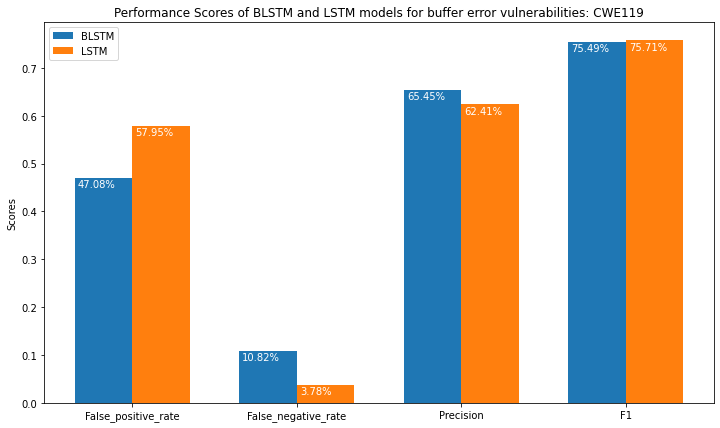

In [68]:
import matplotlib.pyplot as plt
import numpy as np

labels= ["False_positive_rate", "False_negative_rate", "Precision", "F1"]
BLSTM_values = [BLSTM_performance[m] for m in labels] # getting the value of each metric for BLSTM
LSTM_values = [LSTM_performance[m] for m in labels] # getting the value of each metric for LSTM

fig, ax = plt.subplots(figsize=(12,7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
ax.set_xticks(x)  # setting x-axis ticks
ax.set_xticklabels(labels) # setting the labels on x-axis ticks
rects1 = ax.bar(x - width/2, BLSTM_values, width, label='BLSTM')  # plotting BLSTM performance bars
rects2 = ax.bar(x + width/2, LSTM_values, width, label='LSTM') # plotting LSTM performance bars
for i in ax.patches:  # adding annotations to the bars
    ax.text(i.get_x()+0.02, i.get_height()-0.02, str(round(100*i.get_height(),2))+'%', color='white', fontsize=10)

ax.set_ylabel('Scores')  # setting y-axis label
ax.set_title('Performance Scores of BLSTM and LSTM models for buffer error vulnerabilities: CWE119') # setting the title
ax.legend() # showing the legend of the graph
plt.show()

In [69]:
BLSTM_performance = {
    "False_positive_rate": FPR_blstm2,
    "False_negative_rate": FNR_blstm2,
    "Precision": precision_blstm2,
    "F1": f1_score_blstm2
}

LSTM_performance = {
    "False_positive_rate": FPR_lstm2,
    "False_negative_rate": FNR_lstm2,
    "Precision": precision_lstm2,
    "F1": f1_score_lstm2
}

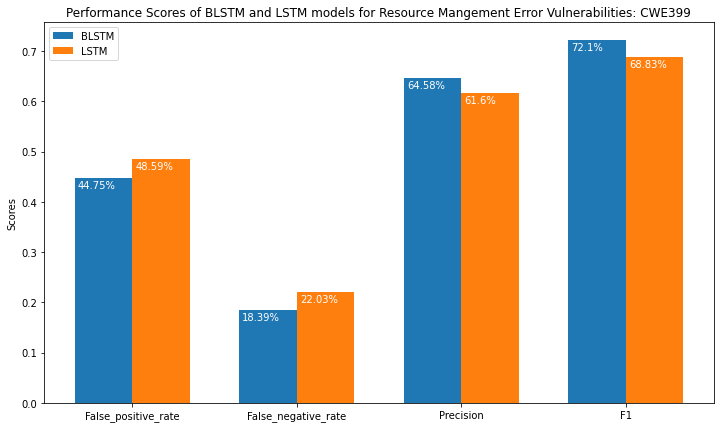

In [70]:
import matplotlib.pyplot as plt
import numpy as np

labels= ["False_positive_rate", "False_negative_rate", "Precision", "F1"]
BLSTM_values = [BLSTM_performance[m] for m in labels] # getting the value of each metric for BLSTM
LSTM_values = [LSTM_performance[m] for m in labels] # getting the value of each metric for LSTM

fig, ax = plt.subplots(figsize=(12,7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
ax.set_xticks(x)  # setting x-axis ticks
ax.set_xticklabels(labels) # setting the labels on x-axis ticks
rects1 = ax.bar(x - width/2, BLSTM_values, width, label='BLSTM')  # plotting BLSTM performance bars
rects2 = ax.bar(x + width/2, LSTM_values, width, label='LSTM') # plotting LSTM performance bars
for i in ax.patches:  # adding annotations to the bars
    ax.text(i.get_x()+0.02, i.get_height()-0.02, str(round(100*i.get_height(),2))+'%', color='white', fontsize=10)

ax.set_ylabel('Scores')  # setting y-axis label
ax.set_title('Performance Scores of BLSTM and LSTM models for Resource Mangement Error Vulnerabilities: CWE399') # setting the title
ax.legend() # showing the legend of the graph
plt.show()

In [71]:
Cwe119_confusion_matrix1 = [[1862, 983],
                           [226, 1105]]

Cwe119_confusion_matrix2 = [[2009, 1210],
                            [79, 878]]

Cwe399_confusion_matrix3 = [[1189, 652],
                            [268, 805]]

Cwe399_confusion_matrix4 = [[1136, 708],
                            [321, 749]]

classes = ['Vulnerable','Non-vulnerable']

In [72]:
import seaborn as sns

def plot_confusion_matrix(matrix, classes, model_name):
    plt.subplots(figsize=(10, 6))
     # converting the confusion matrix into a dataframe so that the heatmap reads the class labels automatically
    confusion_df = pd.DataFrame(matrix)
    confusion_df.columns = classes # setting colum names to classes in the confusion matrix dataframe
    confusion_df.index = classes # setting the index to classes in the confusion matrix dataframe
    # creating a heatmap for the confusion matrix
    ax = sns.heatmap(confusion_df, cmap='coolwarm', annot=True, fmt="d", annot_kws={'size':10})
    # putting x-axis labels at top
    ax.xaxis.tick_top()
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_title("Confusion Matrix for "+model_name+'\n', fontsize=15)

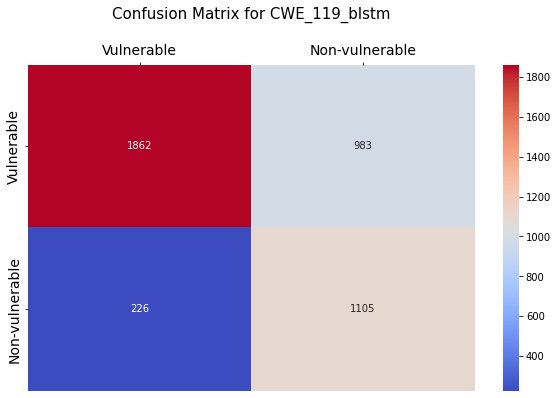

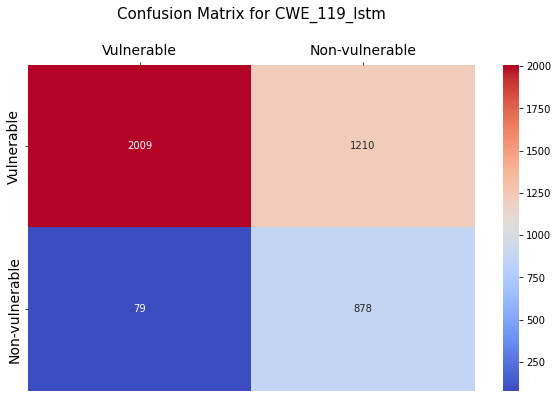

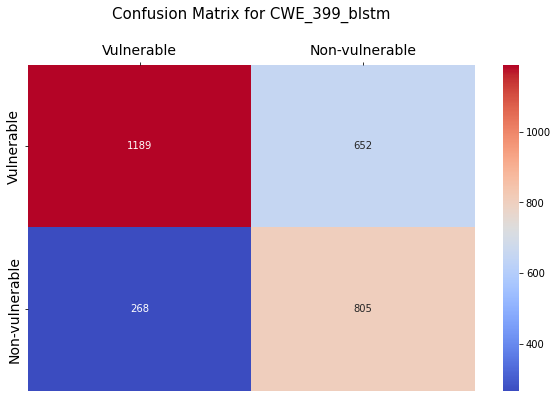

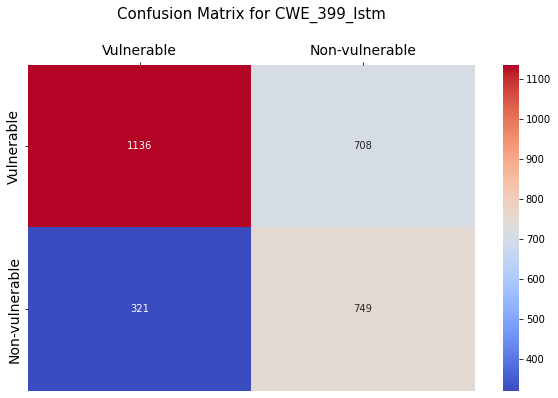

In [73]:
plot_confusion_matrix(np.array(Cwe119_confusion_matrix1), classes, "CWE_119_blstm")
plot_confusion_matrix(np.array(Cwe119_confusion_matrix2), classes, "CWE_119_lstm")
plot_confusion_matrix(np.array(Cwe399_confusion_matrix3), classes, "CWE_399_blstm")
plot_confusion_matrix(np.array(Cwe399_confusion_matrix4), classes, "CWE_399_lstm")